In [34]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

In [22]:
sns.set(
    font_scale = 1,
    style = 'whitegrid',
    rc={'figure.figsize': (12, 5)}
)

In [4]:
df = pd.read_csv("../data/2.9 conversion.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# Задание 1
## Построить график распределения заказов

e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Impressions', ylabel='Count'>

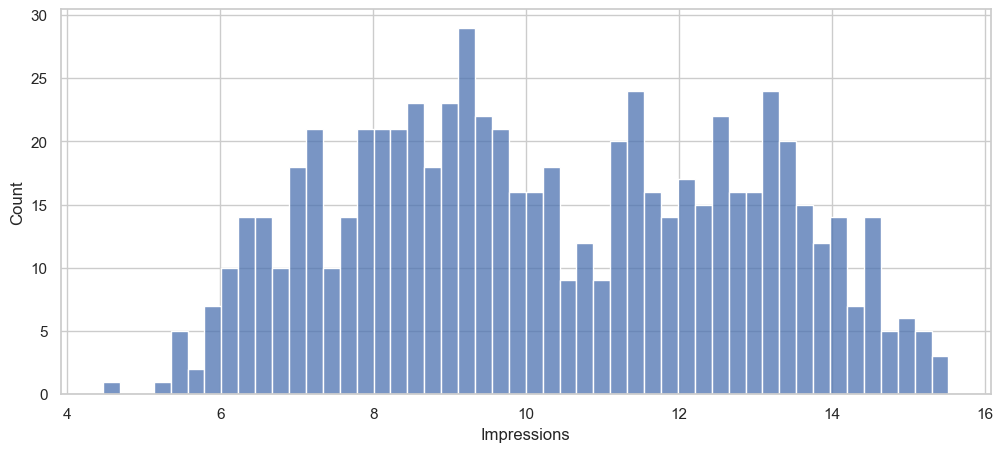

In [23]:
sns.histplot(np.log(df.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins=50)

# Задание 2
## Добавить CTR и построить график распределения

In [26]:
df['ctr'] = df.Clicks / df.Impressions

In [35]:
stats.mode(df.ctr)

ModeResult(mode=0.0, count=207)

In [37]:
df.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
dtype: float64

e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

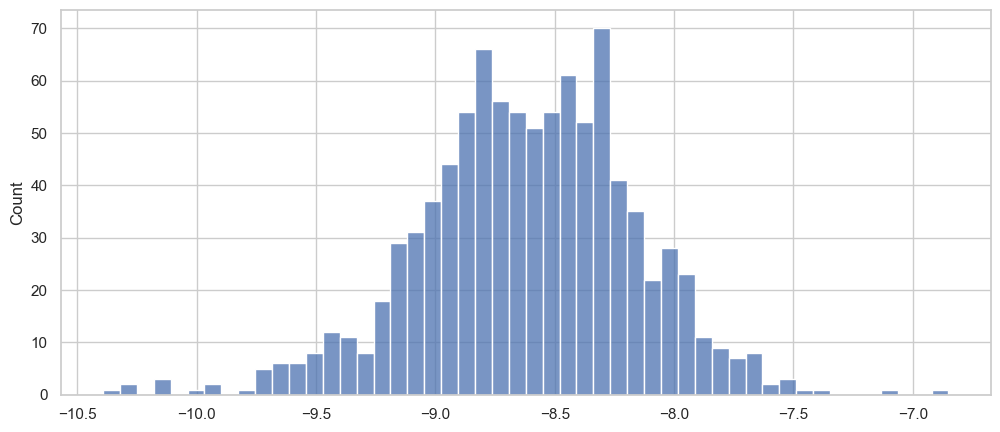

In [36]:
sns.histplot(np.log(df.ctr), kde=False, bins=50)

# Задание 3
## Проанализировать CTR по рекламным компаниям

In [39]:
df_xyz_campaign = df \
    .groupby('xyz_campaign_id') \
    .agg(
        Clicks      = ('Clicks', 'sum'),
        Impressions = ('Impressions', 'sum'),
    )

In [40]:
df_xyz_campaign['ctr'] = df_xyz_campaign.Clicks / df_xyz_campaign.Impressions

In [42]:
df_xyz_campaign.sort_values('ctr', ascending=False)

,Clicks,Impressions,ctr
xyz_campaign_id,,,
936,1984,8128187,0.000244
916,113,482925,0.000234
1178,36068,204823716,0.000176


# Задание 4
## Посчитать CPC и поиследовать его

In [45]:
df['cpc'] = (df.Spent / df.Clicks)

In [76]:
df.cpc.agg({
    'Мода'     : lambda x: x.mode()[0],
    'Среднее'  : 'mean',
    'Медиана'  : 'median',
    'IQR'      : lambda x: x.quantile(0.75) - x.quantile(0.25),
    'Дисперсия': 'var',
    'std'      : 'std',
})

Мода         1.380000
Среднее      1.499347
Медиана      1.498273
IQR          0.254364
Дисперсия    0.054232
std          0.232879
Name: cpc, dtype: float64

# Задание 5
## Визуализировать CPC по полу

e:\Users\burmos_aa\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cpc', ylabel='Density'>

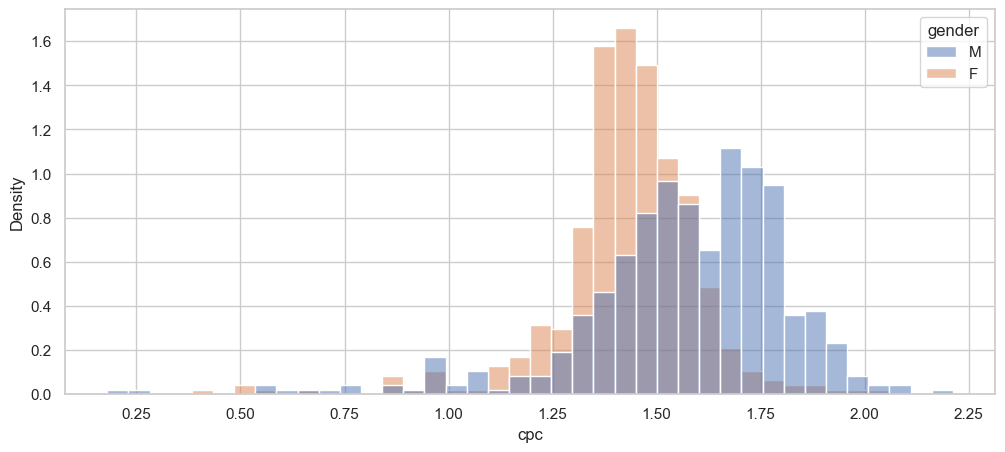

In [82]:
sns.histplot(df, x='cpc', kde=False, hue='gender', common_norm=True, stat='density')

# Задание 6
## Считаю конверисю из клика в покупку

In [84]:
df['Approved_Conversion_'] = (df.Approved_Conversion / df.Clicks).fillna(0)

In [88]:
df.head(100)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,Approved_Conversion_
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,735033,936,108792,35-39,F,36,652,0,0.00,0,0,0.000000,NaN,0.0
96,735043,936,108793,35-39,F,63,1357,0,0.00,1,1,0.000000,NaN,inf
97,735048,936,108794,35-39,F,64,1393,0,0.00,1,0,0.000000,NaN,0.0
98,735065,936,108797,40-44,F,7,648,0,0.00,1,0,0.000000,NaN,0.0
